
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------===============================================================================================================================
# EDA Case Study
===============================================================================================================================-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## Sidhesh Tonape 
#### Dated:29th September 2021

## Introduction :
In this case study, we study risk analysis in the banking and financial services. Through Exploratory Data Analysis, we will identify various factors that can be helpful in minizing the risk of loosing money while lending to customers. The module of our analysis is as follows:

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


## Dataset 

1)'application_data.csv' contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

2)'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3)'columns_description.csv' is data dictionary which describes the meaning of the variables.

#  1)  Import Libraries

In [1]:
#Import the warnings.

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None) # to view large dataframes

# 2) Reading Datasets

In [2]:
#Read the dataset of "application_data" in inp0 dataframe
inpapp=pd.read_csv("application_data.csv")
inpapp_v1=pd.read_csv("application_data.csv")


#Read the dataset of "previous_application" in inp1 dataframe
inppre=pd.read_csv("previous_application.csv")

#Read the dataset of "columns_description" in desc dataframe
descp=pd.read_csv("columns_description.csv")

In [3]:
#Display the first 5 records
inpapp_v1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Display the first 5 records
inppre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Display the first 5 records
descp.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


# 3) Inspecting the data

In [6]:
inpapp.shape

(307511, 122)

In [7]:
inppre.shape

(1670214, 37)

In [8]:
inpapp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
inpapp.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
inpapp.isnull().sum()/len(inpapp)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

# 4) impute the missing values

In [11]:
import matplotlib.pyplot as plt

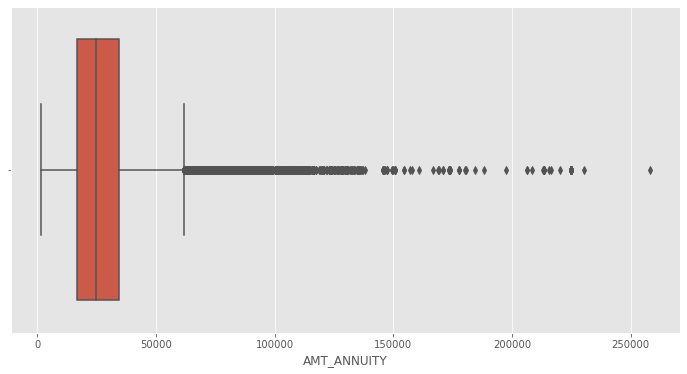

In [12]:
## 'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to impute the missing values

# checking for outliers


plt.style.use('ggplot')
plt.figure(figsize=[12,6])
sns.boxplot(inpapp_v1['AMT_ANNUITY'])
plt.show()

In [13]:
#describe the info of column AMT_ANNUITY
print(inpapp_v1['AMT_ANNUITY'].mean())
print(inpapp_v1['AMT_ANNUITY'].median())
print(inpapp_v1['AMT_ANNUITY'].describe())

27108.573909183444
24903.0
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


# Assumption:

# From the Box Plot we can see that there are sever outliners and the difference between max and min is quite severe. So we are taking median value to replace those null values.

In [14]:
#Verifying the count of missing value for AMT_ANNUITY column
inpapp_v1.AMT_ANNUITY.isnull().sum()

12

In [15]:
# Filling missing values in column AMT_ANNUITY with median
fillMissingVal=inpapp_v1['AMT_ANNUITY'].median()
inpapp_v1['AMT_ANNUITY'].fillna(value = fillMissingVal, inplace =True)

In [16]:
#Verifying the count of missing value for AMT_ANNUITY column
inpapp_v1.AMT_ANNUITY.isnull().sum()

0

# 5)  Searching for the column for null values

In [17]:
inpapp_v1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# 6) Searching for the column for null values


In [18]:
emptycol=inpapp_v1.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

In [19]:
emptycol = list(emptycol[emptycol.values>=0.3].index)
inpapp_v1.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [20]:
#shape

inpapp_v1.shape

(307511, 58)

# 7)  Remove unwanted coloumn

In [21]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

inpapp_v1.drop(labels=unwanted,axis=1,inplace=True)

In [22]:
inpapp_v1.shape

(307511, 28)

# 8) find  categorical columns having  'XNA' values

In [23]:
inpapp_v1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [24]:
inpapp_v1[inpapp_v1['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [25]:
###  Updating the column 'CODE_GENDER' with "F" for the dataset XNA

inpapp_v1.loc[inpapp_v1['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [26]:
inpapp_v1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [27]:
inpapp_v1['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [28]:
inpapp['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

So, for column 'ORGANIZATION_TYPE',
we have total count of 307511 rows of which 55374 rows are having 'XNA' values.
Which means 18% of the column is having this values.
Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

Dropping the rows of total 55374 have 'XNA' values in the organization type column

In [29]:
inpapp_v1=inpapp_v1.drop(inpapp_v1.loc[inpapp_v1['ORGANIZATION_TYPE']=='XNA'].index)
inpapp_v1[inpapp_v1['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

#  9) Conver Numeric data variable into Numeric datatype.


In [30]:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

inpapp_v1[numeric_columns]=inpapp_v1[numeric_columns].apply(pd.to_numeric)
inpapp_v1.head(5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


# 10) Derived Metrics
Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'



In [31]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

inpapp_v1['AMT_INCOME_RANGE']=pd.cut(inpapp_v1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [32]:
inpapp_v1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,MONDAY,11,0,0,0,0,0,0,School,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,MONDAY,9,0,0,0,0,0,0,Government,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,THURSDAY,11,0,0,0,0,1,1,Religion,100000-125000


In [33]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

inpapp_v1['AMT_CREDIT_RANGE']=pd.cut(inpapp_v1['AMT_CREDIT'],bins=bins,labels=slots)


In [34]:
inpapp_v1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


In [35]:
inpapp_v1["TARGET"].value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

# 11) Dividing the dataset into client with payment difficulties (Target=1) and without payment difficulties (Target=0)


In [36]:
target0_df=inpapp_v1.loc[inpapp_v1["TARGET"]==0]
target1_df=inpapp_v1.loc[inpapp_v1["TARGET"]==1]

In [37]:
#Calculating Imbalance percentage

#Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

10.55

# 12) Univariate analysis for categories


In [38]:
# Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)

#reusable ploting function



def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

# @ Plotting for AMT_INCOME_RANGE

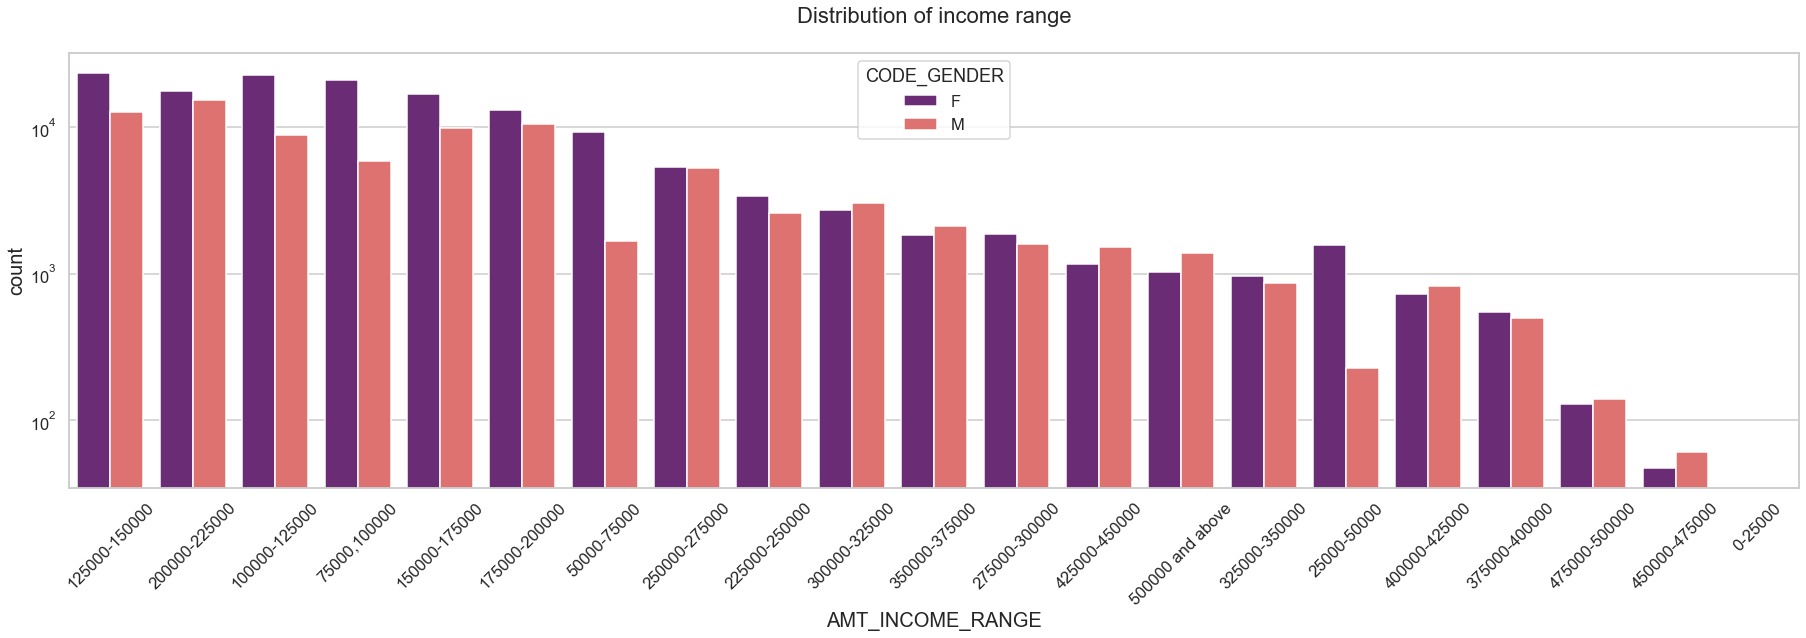

In [39]:
uniplot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


Points to be concluded from the above graph.

> 1) Female counts are higher than male. 

> 2) Income range from 100000 to 200000 is having more number of credits.

> 3) This graph show that females are more than male in having credits for that range.

> 4) Very less count for income range 400000 and above.

# @ Plotting for Income type

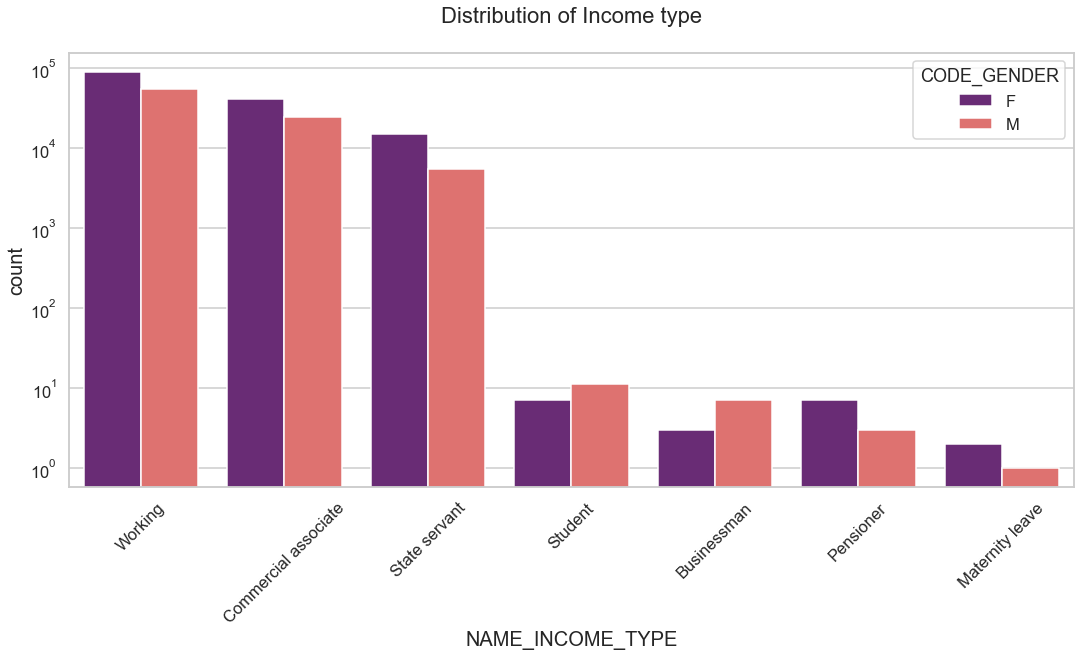

In [40]:
uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')


# Points to be concluded from the above graph.

> 1) For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.

> 2) For this Females are having more number of credits than male.

> 3) Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

# @ Plotting for Contract type


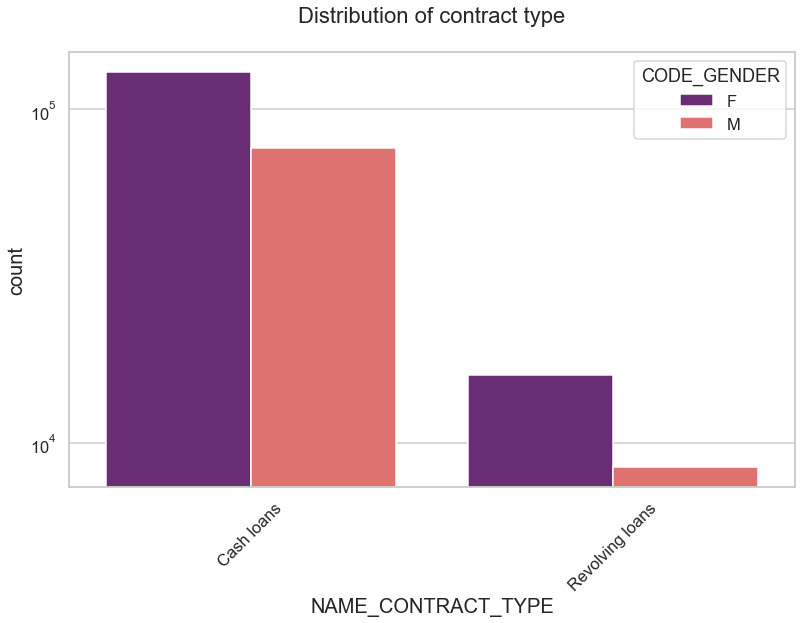

In [41]:
uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')


# Points to be concluded from the above graph.

> For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.

> For this also Female is leading for applying credits.

> For type 1 : there is only Female Revolving loans.

#  @ Plotting for Organization type


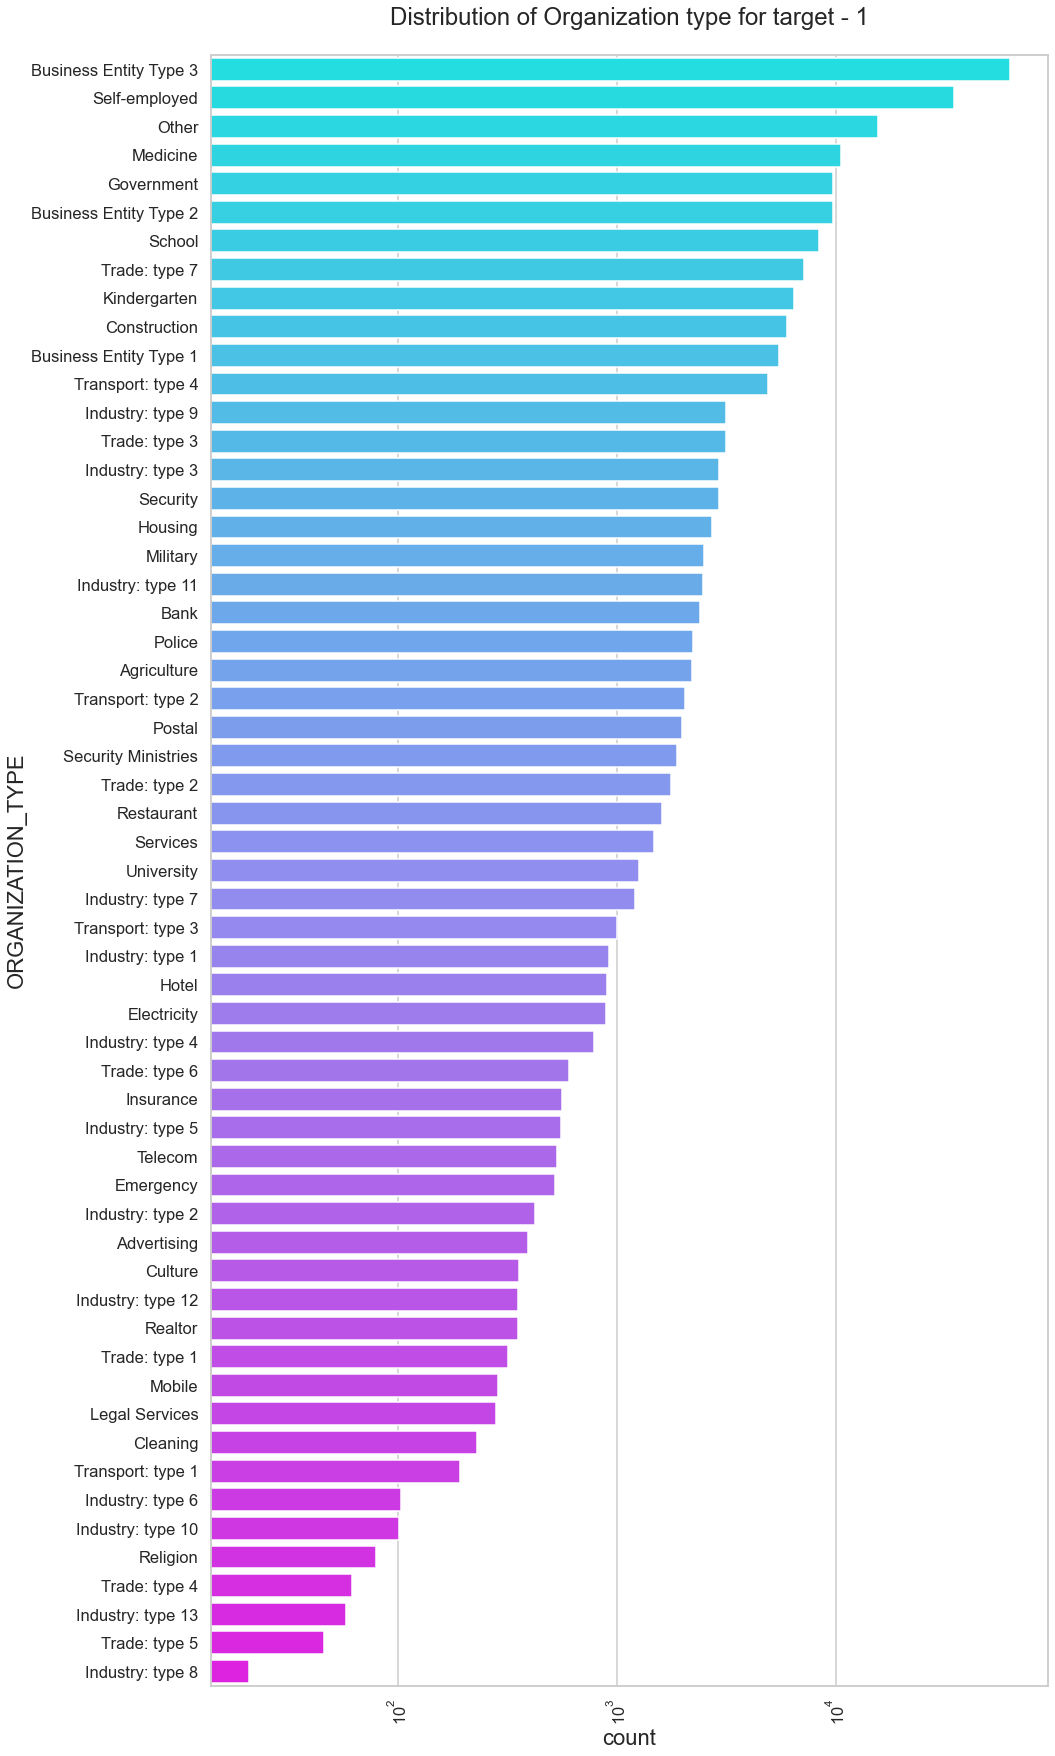

In [42]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

# Points to be concluded from the above graph.

1) Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.

2) Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

3) Same as type 0 in distribution of organization type.

# 13) Finding some correlation for numerical columns for both target 0 and 1

In [43]:
target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

#  @ Correlation for target 0

In [44]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


#  @ Correlation for target 1

In [45]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


# @ Plotting the above correlation with heat map

In [46]:
def targets_corr(data,title):
    plt.figure(figsize=(20,15))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 60

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=True)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()
    
    


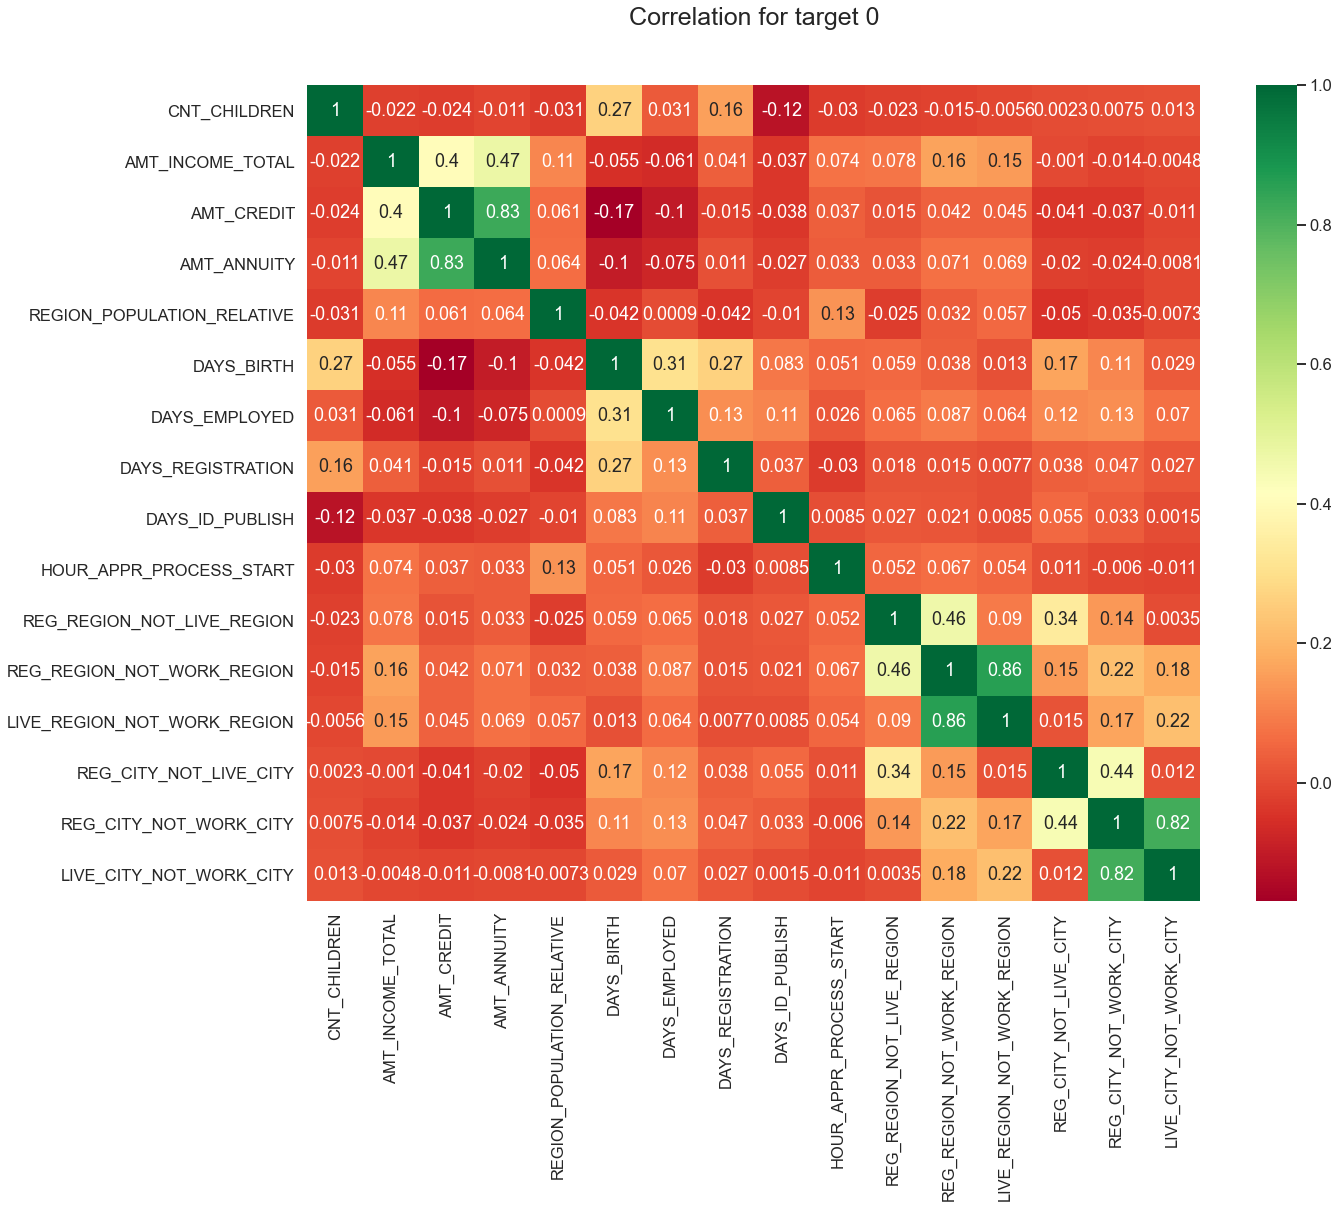

In [47]:
targets_corr(data=target0,title='Correlation for target 0')


# correlation heatmap observation

> Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.

> Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.

> Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

> less children client have in densely populated area.

> Credit amount is higher to densely populated area.

> The income is also higher in densely populated area.


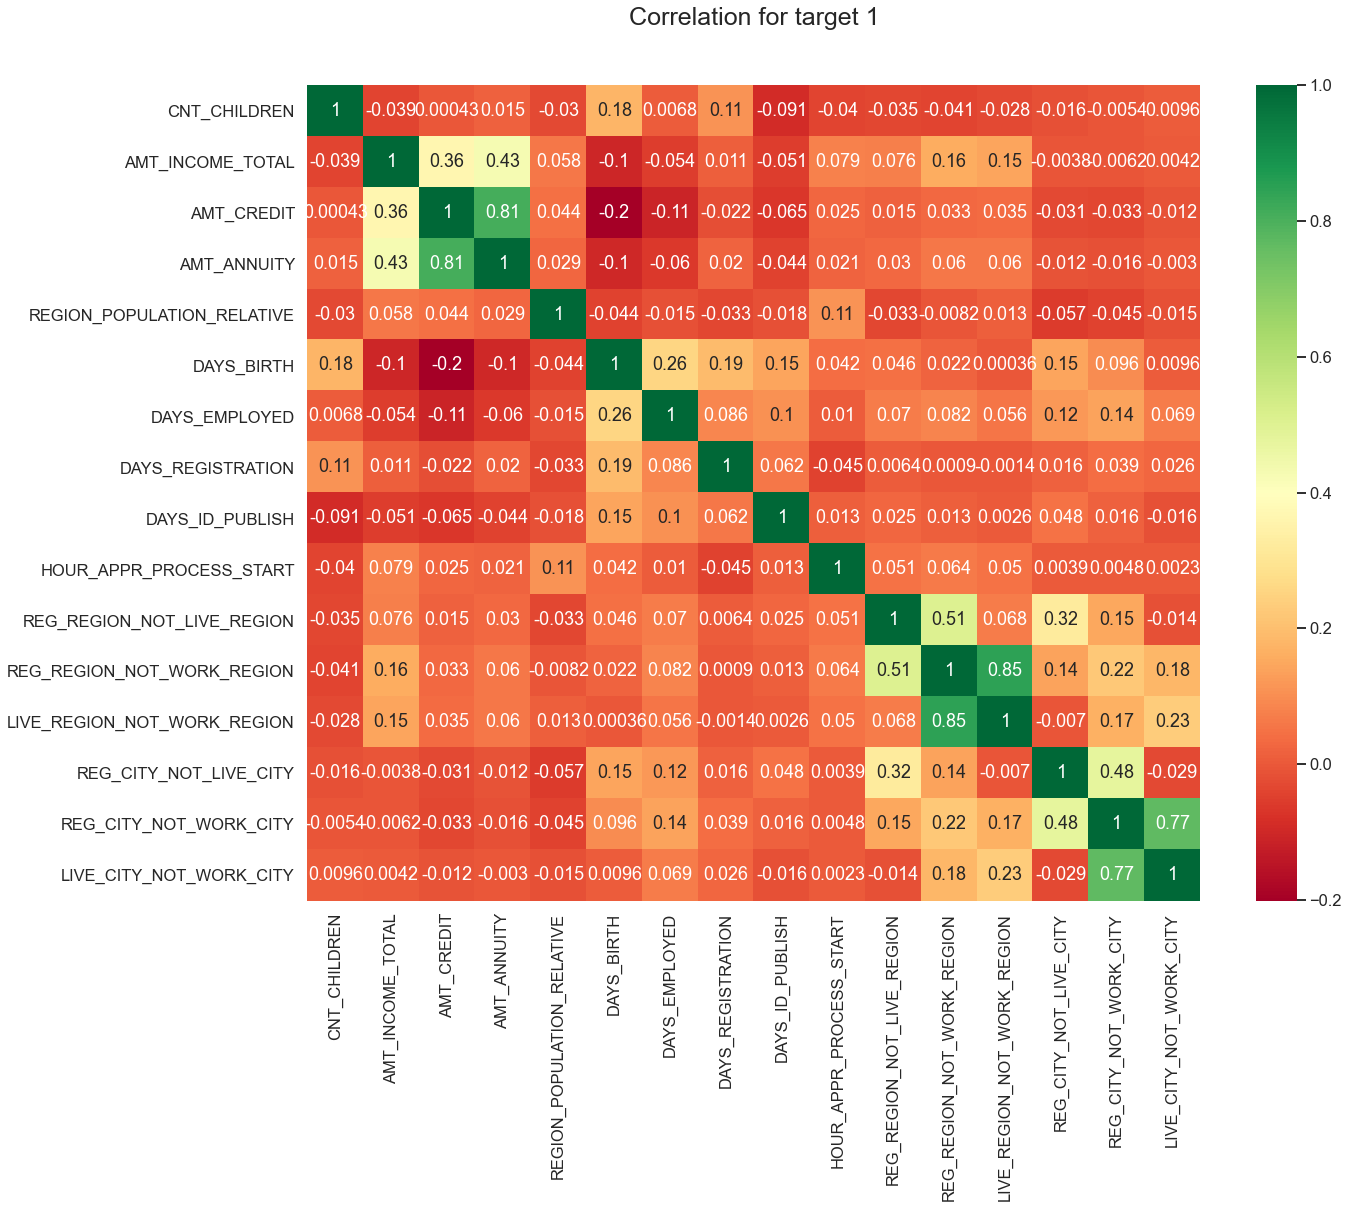

In [48]:
targets_corr(data=target1,title='Correlation for target 1')


# This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

> The client's permanent address does not match contact address are having less children and vice-versa

> the client's permanent address does not match work address are having less children and vice-versa

# 14) Univariate analysis for variables
     
##   @    ' Years_Birth'

In [49]:
# univariate analysis for 'Years_Birth'

#lets change the negative to positive values using abs( )
# and change the days to years

days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
target0[days_col] = target0[days_col].abs()
target0[days_col] = target0[days_col]/365
target0[days_col].describe()

target1[days_col] = target1[days_col].abs()
target1_df[days_col] = target1[days_col]/365
target1[days_col].describe()



,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,16.000000,16.000000,16.000000,16.000000
mean,0.161341,0.139834,0.104514,0.107136
std,0.236143,0.237089,0.243911,0.241327
min,0.000356,0.006823,0.000896,0.002567
25%,0.043832,0.055510,0.014718,0.015778
50%,0.101613,0.075915,0.029798,0.046156
75%,0.179356,0.110421,0.067744,0.071618
max,1.000000,1.000000,1.000000,1.000000


In [50]:
target0.rename(columns={'DAYS_BIRTH':'Years_Birth','DAYS_EMPLOYED':'Years_Employed','DAYS_REGISTRATION':'Years_Registration','DAYS_ID_PUBLISH':'Years_Id_Publish'},inplace=True)
target1.rename(columns={'DAYS_BIRTH':'Years_Birth','DAYS_EMPLOYED':'Years_Employed','DAYS_REGISTRATION':'Years_Registration','DAYS_ID_PUBLISH':'Years_Id_Publish'},inplace=True)


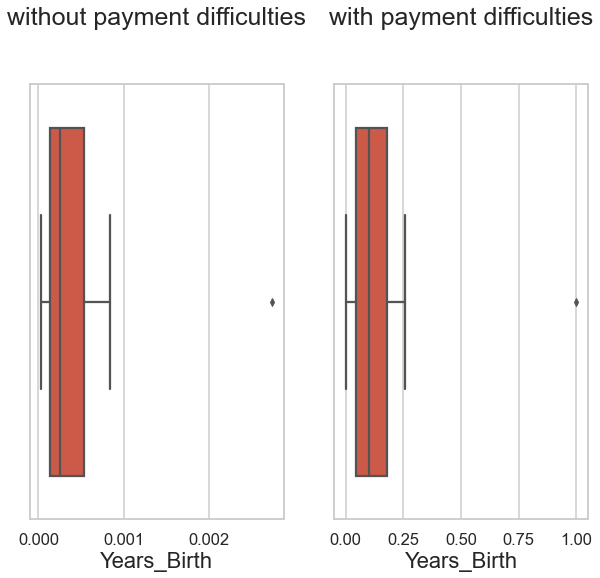

In [51]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(target0['Years_Birth'])
plt.title('without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target1['Years_Birth'])
plt.title('with payment difficulties')
plt.show()

# Observation
From the above box plot we can note that customer without payment difficulties having year in between 34 to 54 years ,
And c ustomer with payment difficulties having in between 31 to 50 years.

## @ 'Years_Employed'

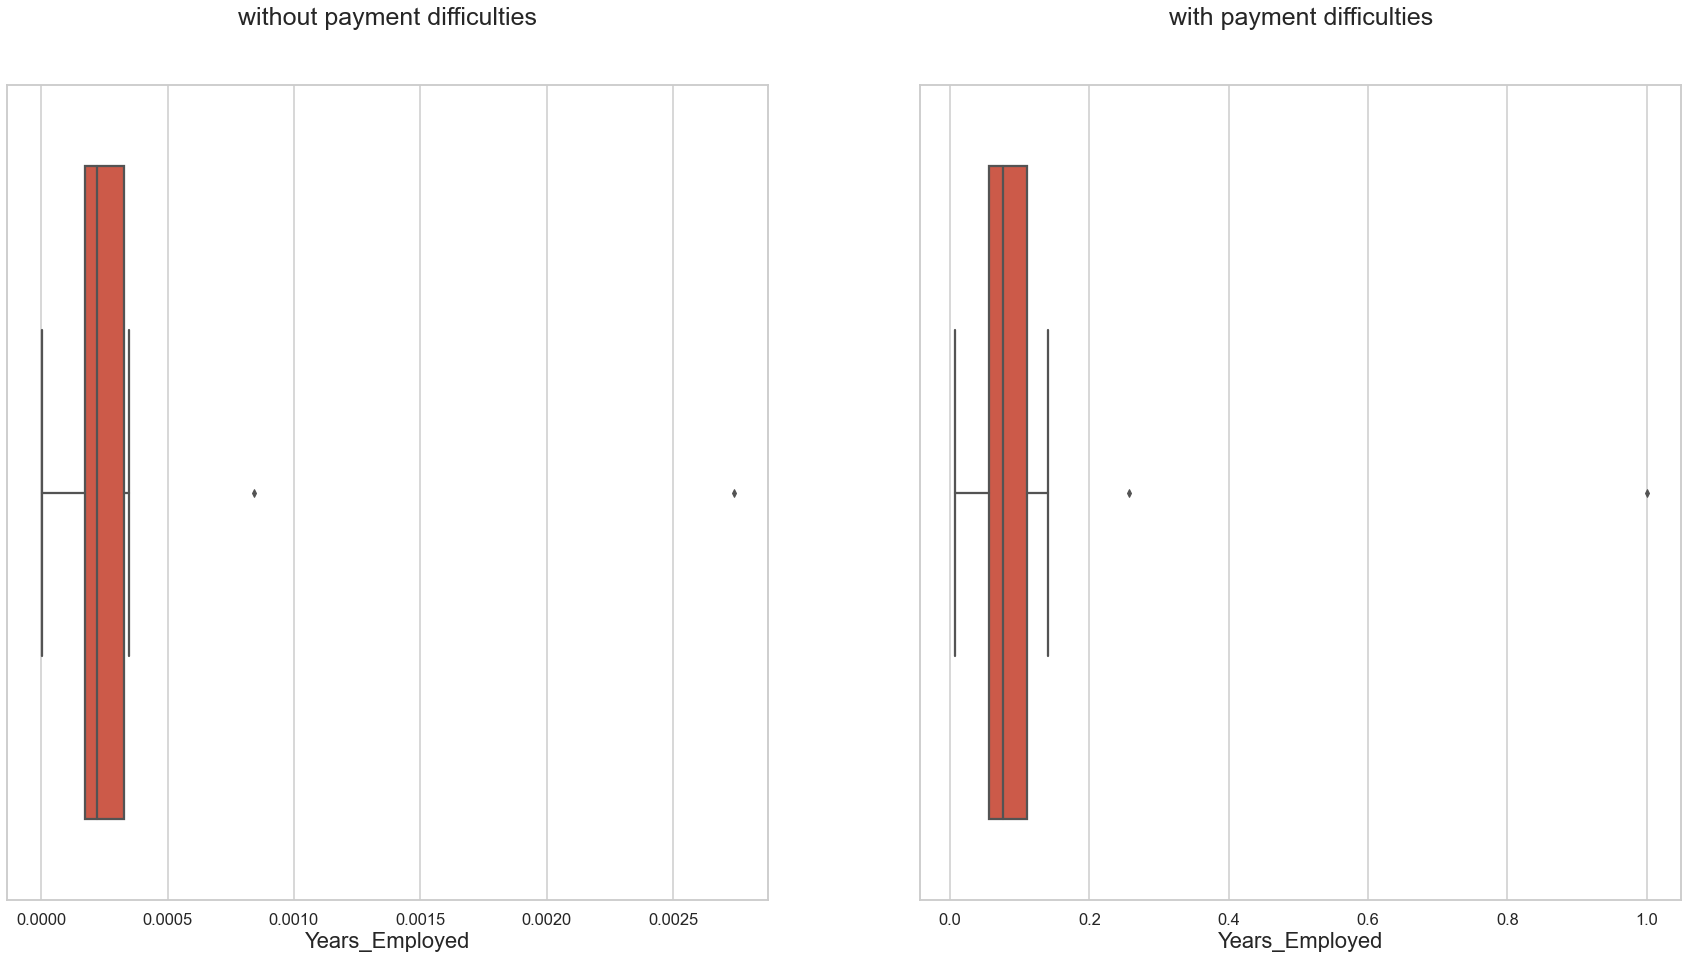

In [52]:
plt.figure(figsize=(30,15))
plt.subplot(1,2,1)
plt.title('without payment difficulties')
sns.boxplot(target0[target0['Years_Employed']<1000]['Years_Employed'])
plt.subplot(1,2,2)
plt.title('with payment difficulties')
sns.boxplot(target1[target1['Years_Employed']<1000]['Years_Employed'])
plt.show()

# Observation

#From the above box plot we can note that customer without payment difficulties having year_employed in between 2 to 10 years ,
#And coustomer with payment difficulties having in between 2 to 8 years.

## @ 'YEARS_ID_PUBLISH'

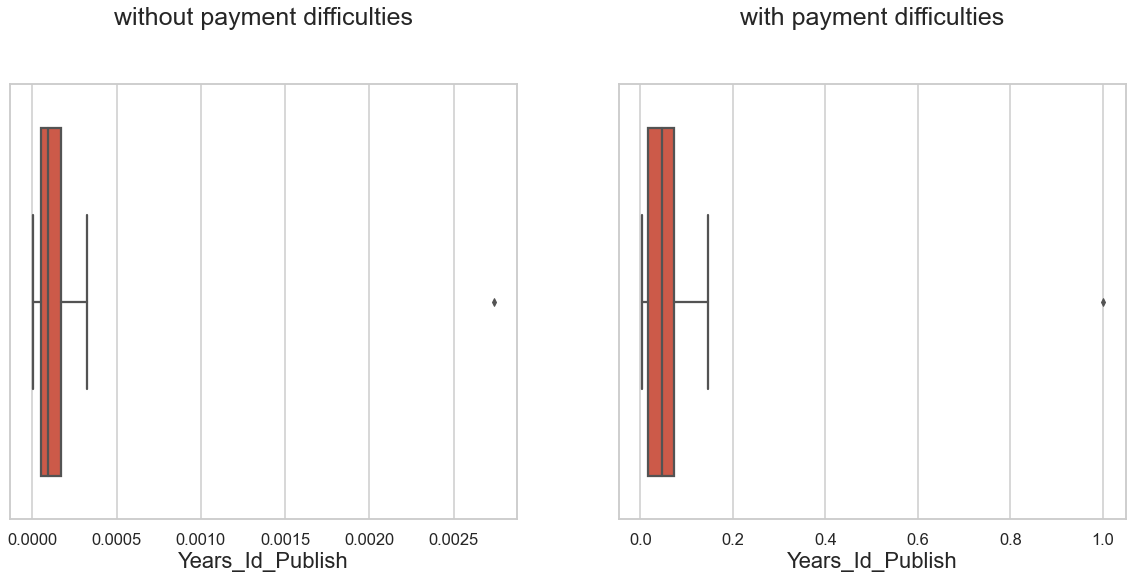

In [53]:
#Univariate Analysis on YEARS_ID_PUBLISH

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(target0['Years_Id_Publish'])
plt.title('without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target1['Years_Id_Publish'])
plt.title('with payment difficulties')
plt.show()

# Observation


 From the above box plot we can note that customer without payment difficulties having YEARS_ID_PUBLISH in between 5 to 11,
 And coustomer with payment difficulties having AMT_GOODS_PRICE in between 3 to 11 years.


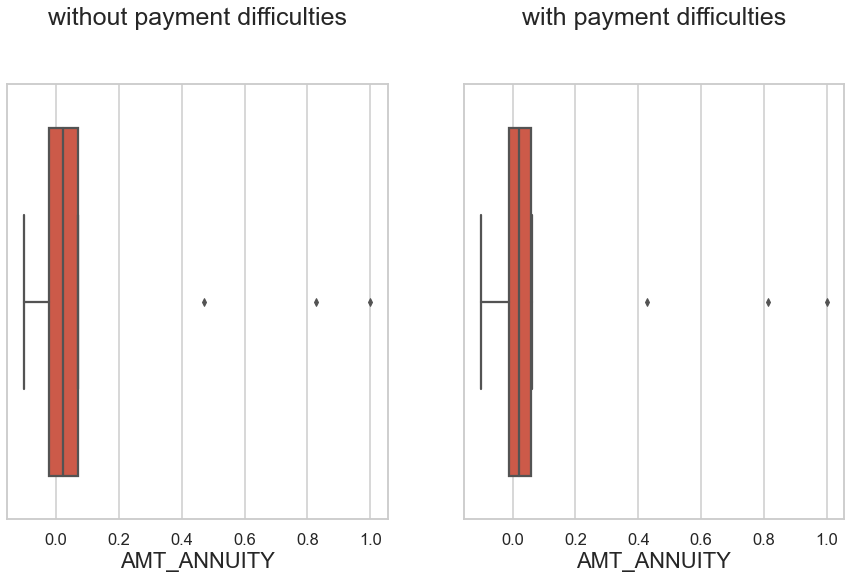

In [54]:
#Univariate Analysis on AMT_ANNUITY

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(target0['AMT_ANNUITY'])
plt.title('without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target1['AMT_ANNUITY'])
plt.title('with payment difficulties')
plt.show()


# Observation

#From the above box plot we can note that customer without payment difficulties having AMT_ANNUITY in between 20000 to 30000,
#And coustomer with payment difficulties having AMT_GOODS_PRICE in between 20000 to 30000 years.

# 15) Univariate analysis for Categorical  variables

## @ NAME_CONTRACT_TYPE

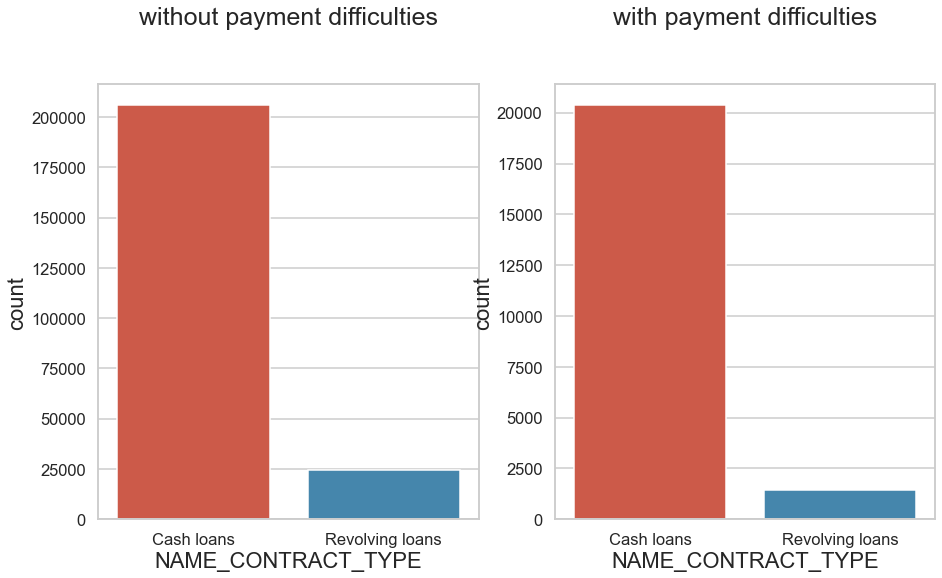

In [55]:
#Univariate Analysis on NAME_CONTRACT_TYPE

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(target0_df['NAME_CONTRACT_TYPE'])
plt.title('without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(target1_df['NAME_CONTRACT_TYPE'])
plt.title('with payment difficulties')
plt.show()

# Observation
#Here we can see that customer without payment difficulties and customer with payment difficulties are taking cash loans

## @ CODE_GENDER

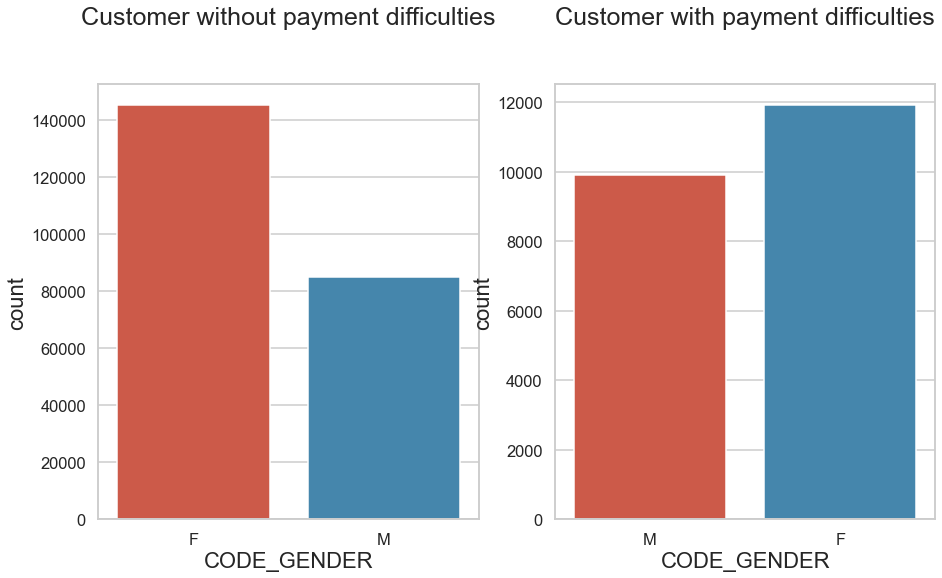

In [56]:
#Univariate Analysis on CODE_GENDER

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(target0_df['CODE_GENDER'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(target1_df['CODE_GENDER'])
plt.title('Customer with payment difficulties')
plt.show()

# Observation

Here we can see that Females are more in number,in both cases

## @ NAME_EDUCATION_TYPE

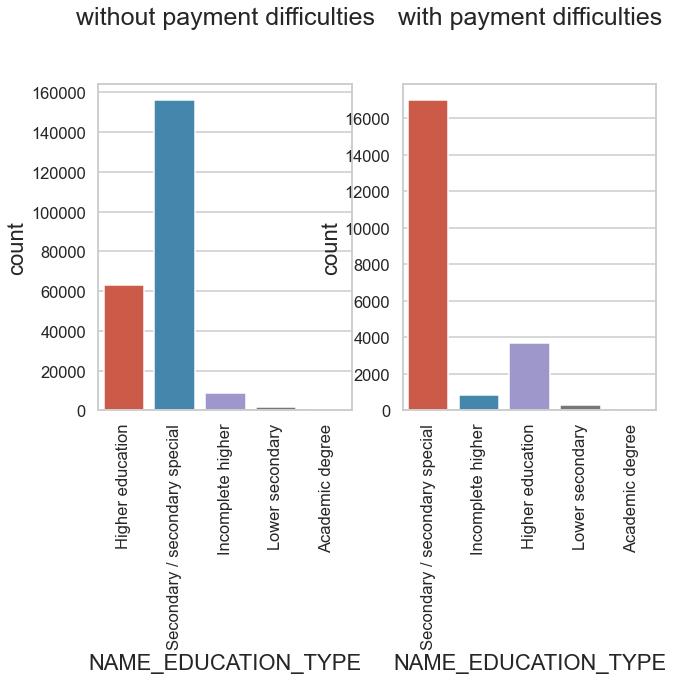

In [57]:
#Univariate Analysis on NAME_EDUCATION_TYPE

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target0_df['NAME_EDUCATION_TYPE'])
plt.title('without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target1_df['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.title('with payment difficulties')
plt.show()

# Observation
Here , we can see that secondary/secondary special are more in number ,in both cases

## @ NAME_HOUSING_TYPE

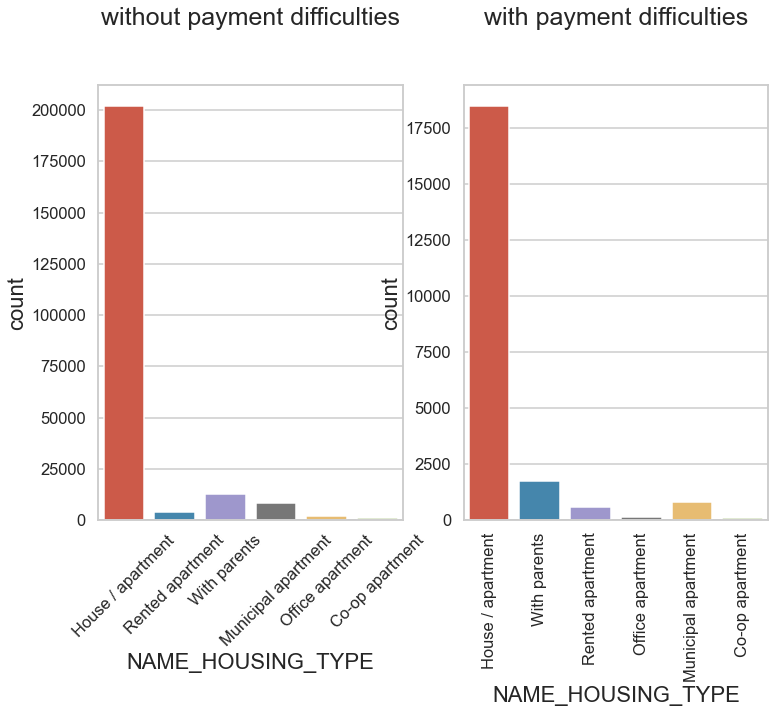

In [58]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(target0_df['NAME_HOUSING_TYPE'])
plt.title('without payment difficulties')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(target1_df['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.title('with payment difficulties')
plt.show()

# Observation

Here, we can see that House/Apartment category are more in number in both cases


## @ ' OCCUPATION_TYPE'

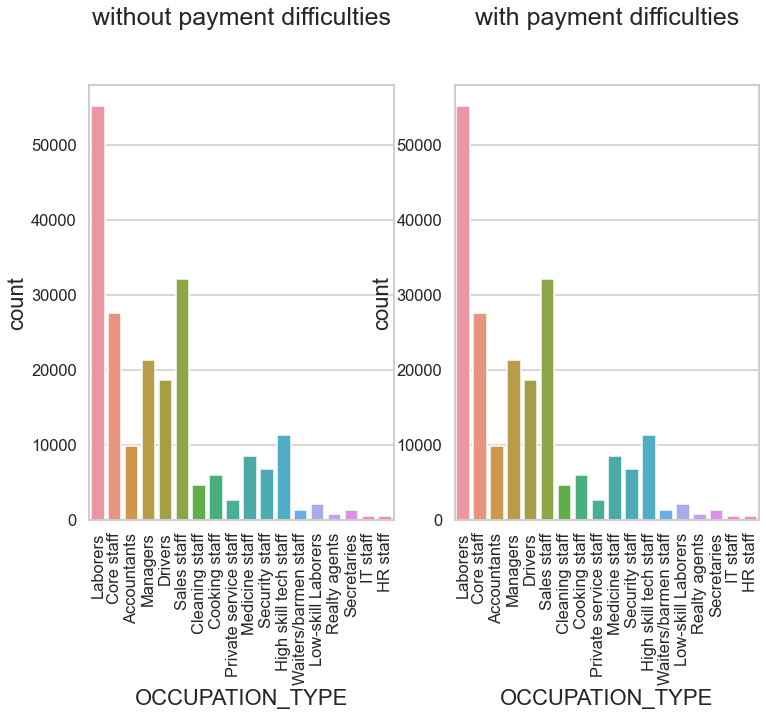

In [59]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(inpapp['OCCUPATION_TYPE'], data=inpapp[(inpapp.TARGET == 0)])
plt.title('without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(inpapp['OCCUPATION_TYPE'], data=inpapp[(inpapp.TARGET == 1)])
plt.xticks(rotation=90)
plt.title('with payment difficulties')
plt.show()

# Observation


1. Here,we can see labourers are facing more difficulty in paying loans,sales staff and core staff too facing difficulty in paying loans

# 16) Bivariate Analysis 

## @ 'AMT_CREDIT and AMT_GOODS_PRICE'

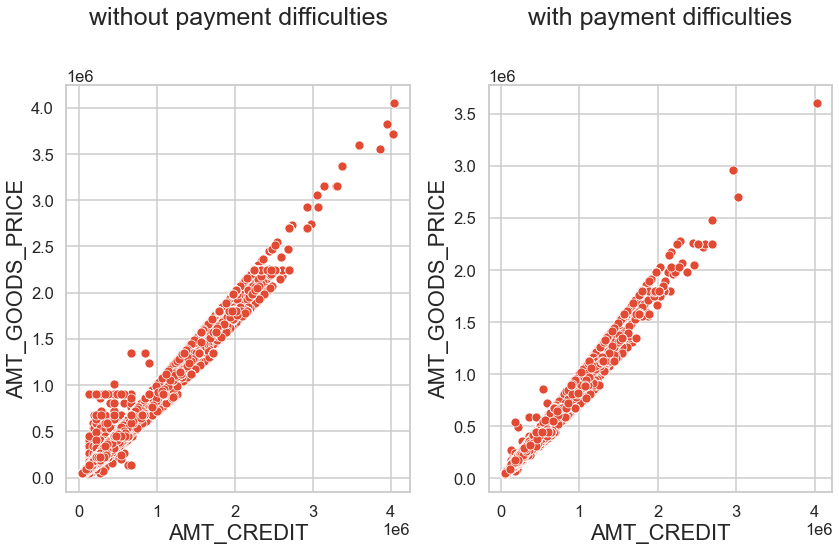

In [61]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(data=inpapp[(inpapp.TARGET == 0)],x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=inpapp[(inpapp.TARGET == 1)],x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('with payment difficulties')
plt.tight_layout()
plt.show()

# Observation 
​
Here we can see that, positively correlated(goods price is positivey correlated to credit amount)
​

## @ 'AMT_CREDIT' and 'AMT_ANNUITY'

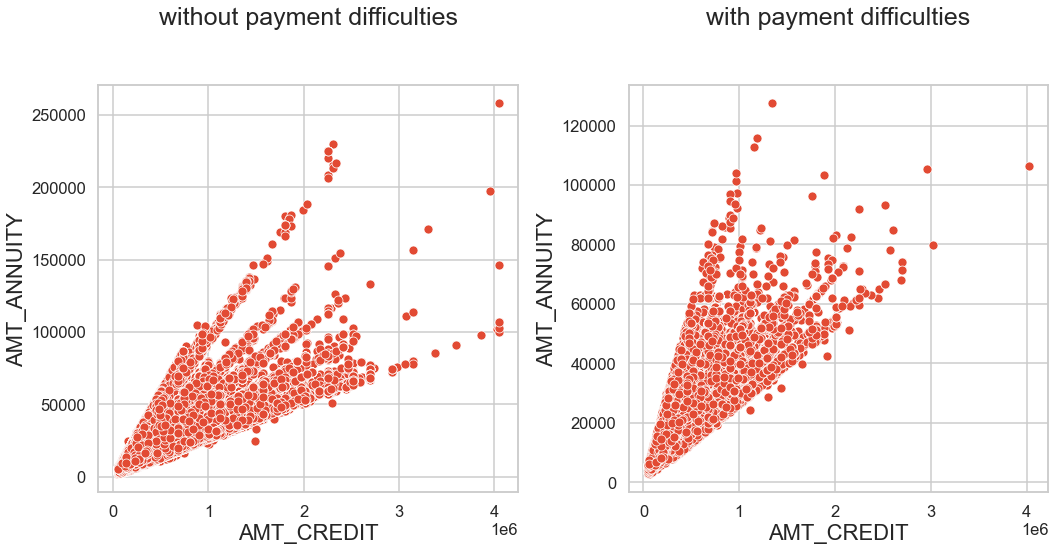

In [62]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(data=target0_df,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=target1_df,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('with payment difficulties')
plt.tight_layout()
plt.show()

# Observation
we can conclude that, people with out payment difficulties take more credit for the annuity 


# 17) categorical - categorical bivariate analysis


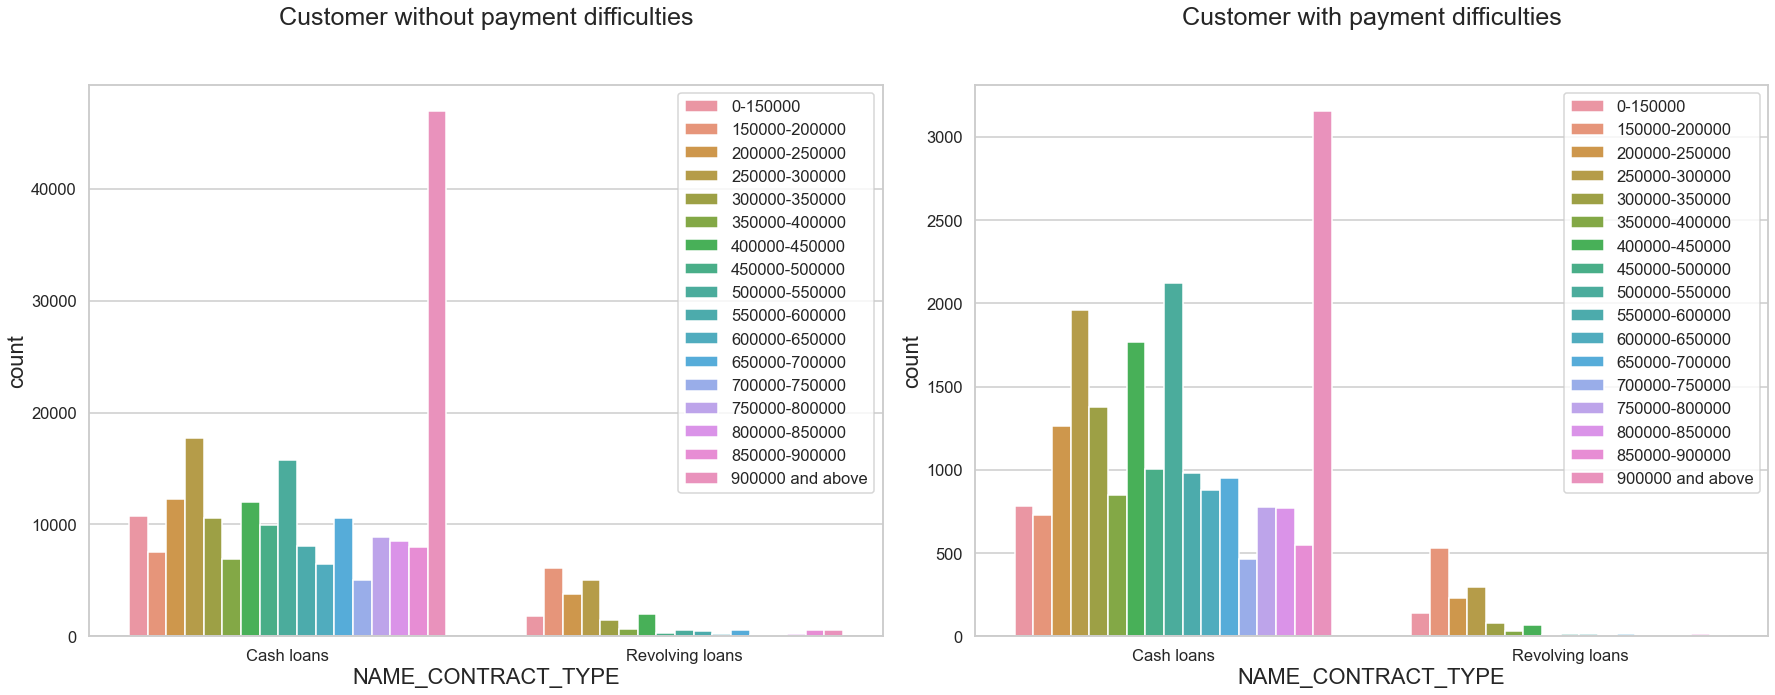

In [63]:
#bivariate analysis on NAME_CONTRACT_TYPE and Amt_Credit_Range

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.countplot(data=target0_df,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=target1_df,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [64]:
# Here we can see ,most of the people taking cash loans and people without facing payment diffuclties have revovling loans more than other case


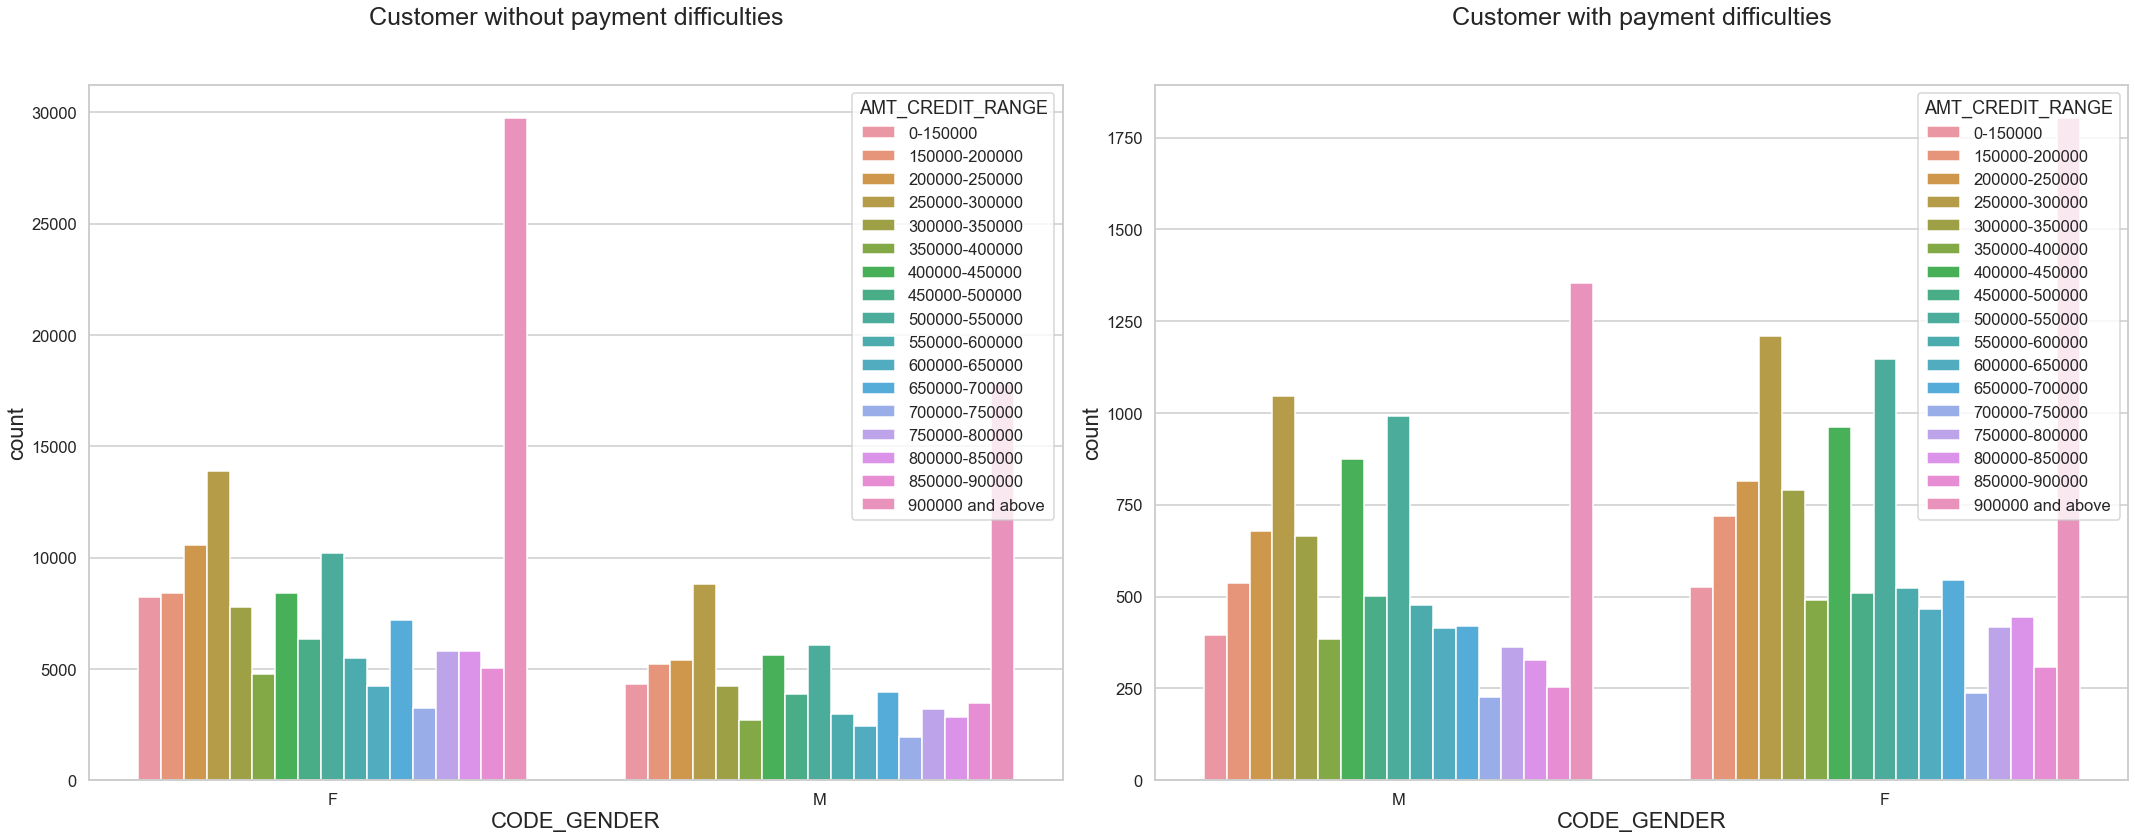

In [65]:
#bivariate analysis on CODE_GENDER and Amt_Credit_Range

plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
sns.countplot(data=target0_df,x='CODE_GENDER',hue='AMT_CREDIT_RANGE')
#plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=target1_df,x='CODE_GENDER',hue='AMT_CREDIT_RANGE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
#plt.legend(loc='upper right')
plt.show()


In [66]:
# here we can see that, Females are more in number taking loans and females have more amount credit range in both cases


# 18 ) Box plotting for Credit amount

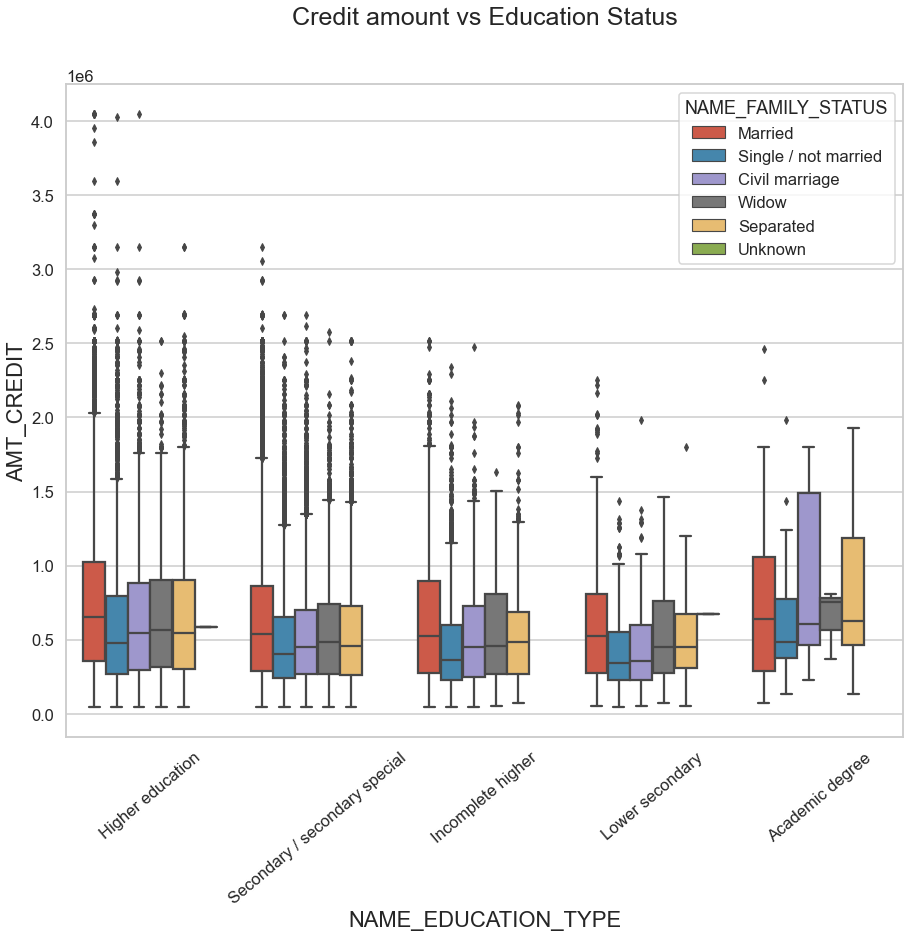

In [67]:
plt.figure(figsize=(15,12))
plt.xticks(rotation=40)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

# Observation

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

# 19) Box plotting for credit amount


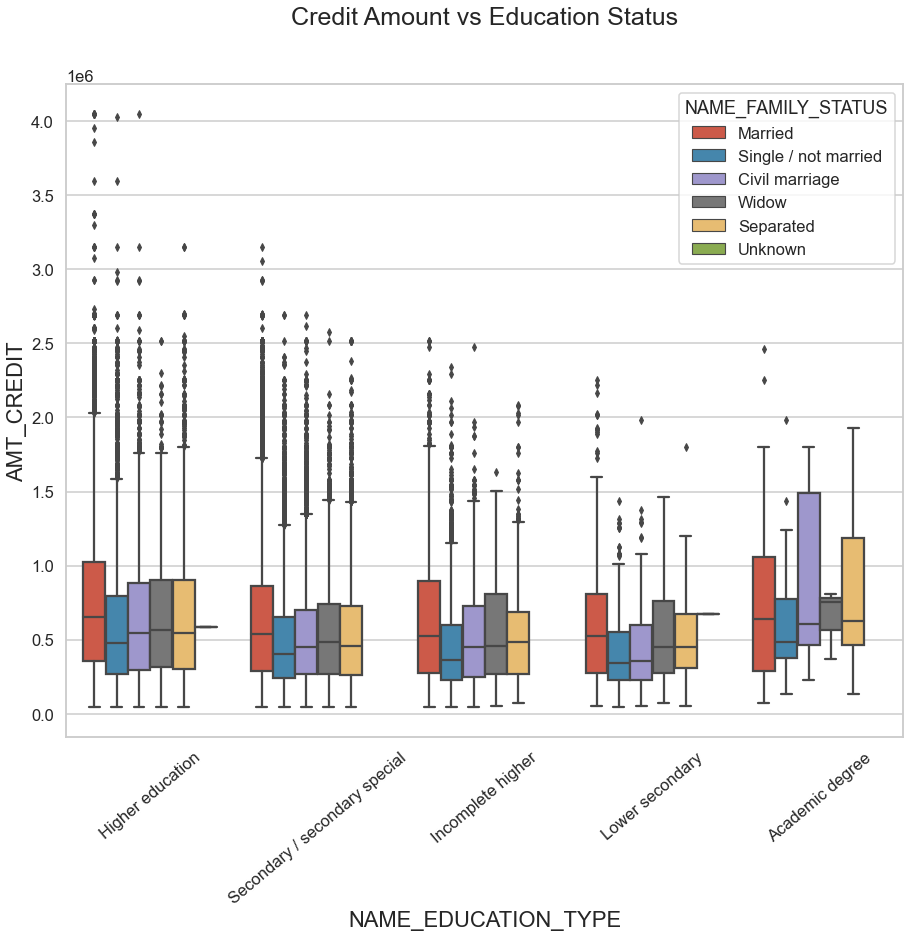

In [68]:
plt.figure(figsize=(15,12))
plt.xticks(rotation=40)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

# Observation

Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

# 20) Box plotting for Income amount in logarithmic scale


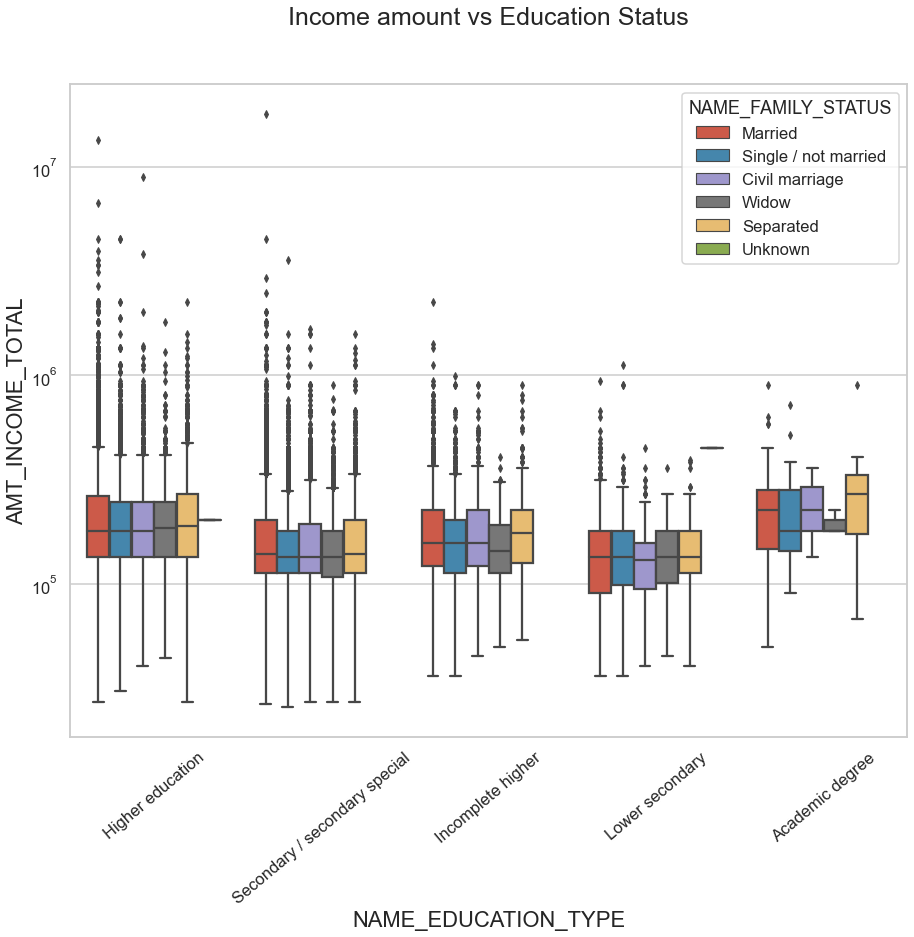

In [69]:
plt.figure(figsize=(15,12))
plt.xticks(rotation=40)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

# Observation

Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

# 21) Working on Previous Application dataset


In [70]:
#Read the dataset of "previous_application" in inp1 dataframe
inppre=pd.read_csv("previous_application.csv")

In [71]:
inppre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Cleaning the missing data

emptycol1=inppre.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

# @ Removing those 15 columns


In [73]:
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
inppre.drop(labels=emptycol1,axis=1,inplace=True)

inppre.shape

(1670214, 22)

# Removing the column values of 'XNA' and 'XAP'


In [74]:
inppre=inppre.drop(inppre[inppre['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inppre=inppre.drop(inppre[inppre['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inppre=inppre.drop(inppre[inppre['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

inppre.shape

(69635, 22)

# 22) Now merging the Application dataset with previous appliaction dataset


In [75]:
all_app=pd.merge(left=inpapp,right=inppre,how='inner',on='SK_ID_CURR',suffixes='_x')


In [76]:
all_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY',
       ...
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP'],
      dtype='object', length=143)

In [77]:
all_app1 = all_app.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)




In [78]:
all_app1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [79]:
all_app1.shape

(59413, 130)

# 23) Distribution of contract status in logarithmic scale


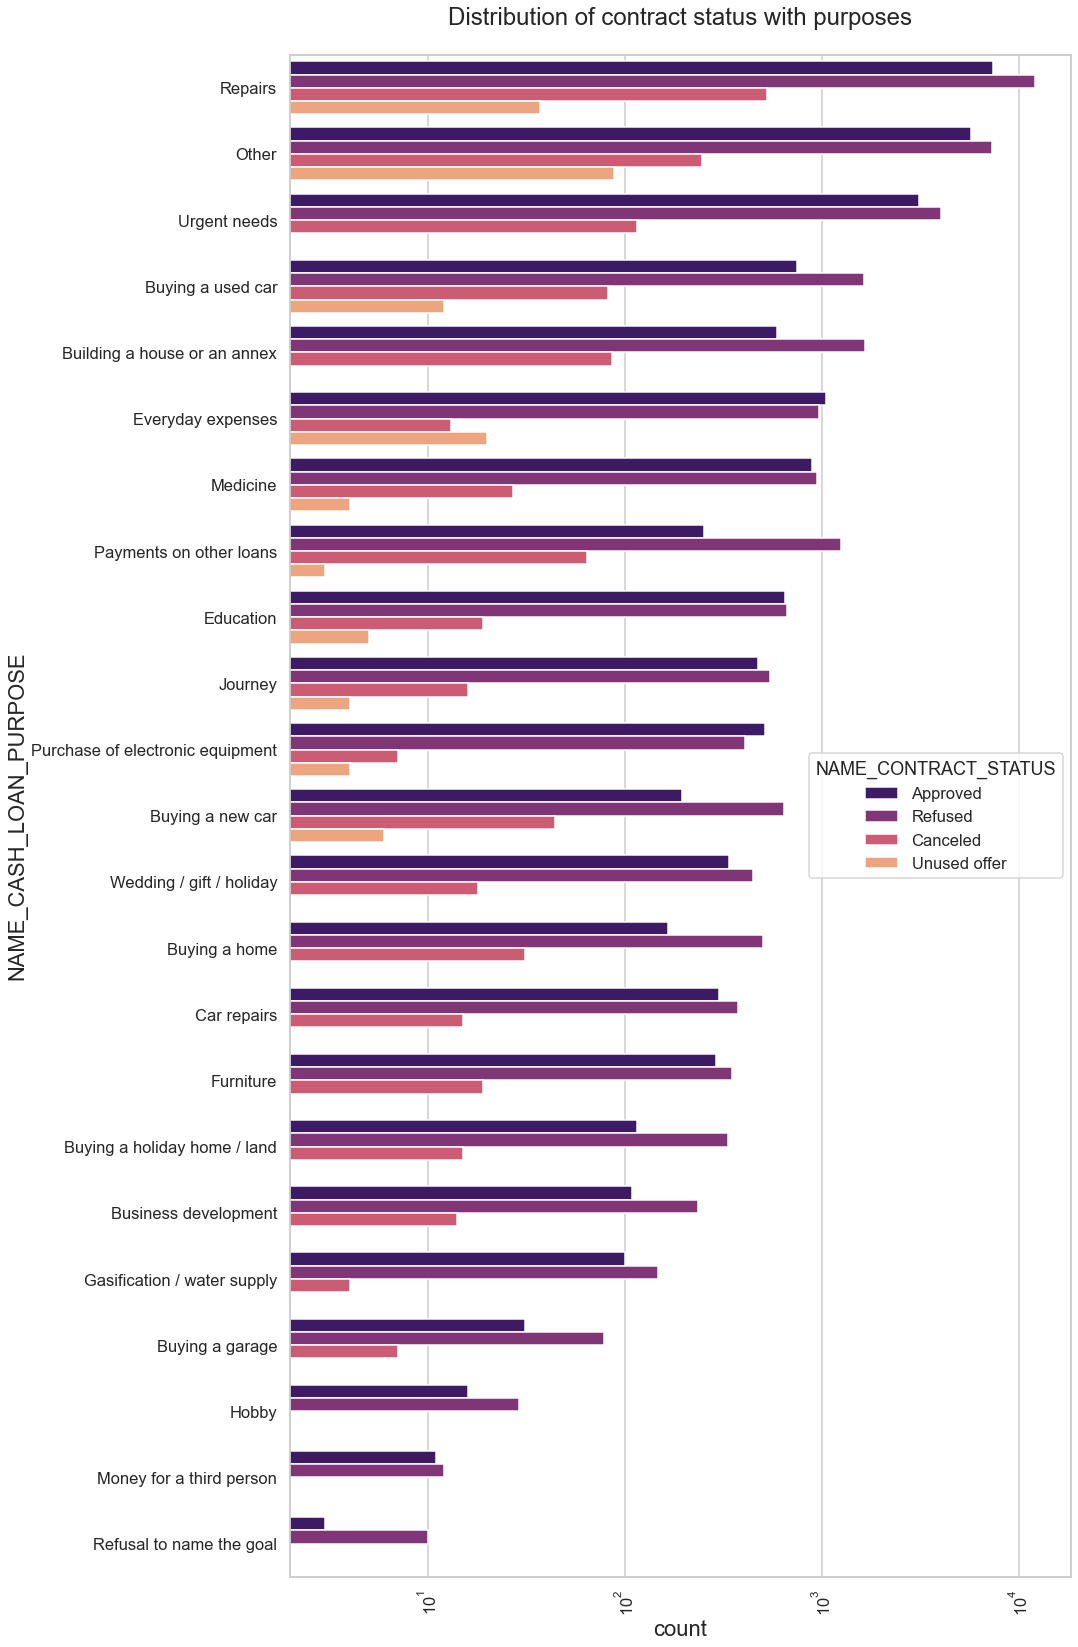

In [80]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(14,28))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = all_app1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=all_app1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')  

# observation

1) Most rejection of loans came from purpose 'repairs'.

2) For education purposes we have equal number of approves and rejection

3) Payign other loans and buying a new car is having significant higher rejection than approves.

# 24) Distribution of contract status


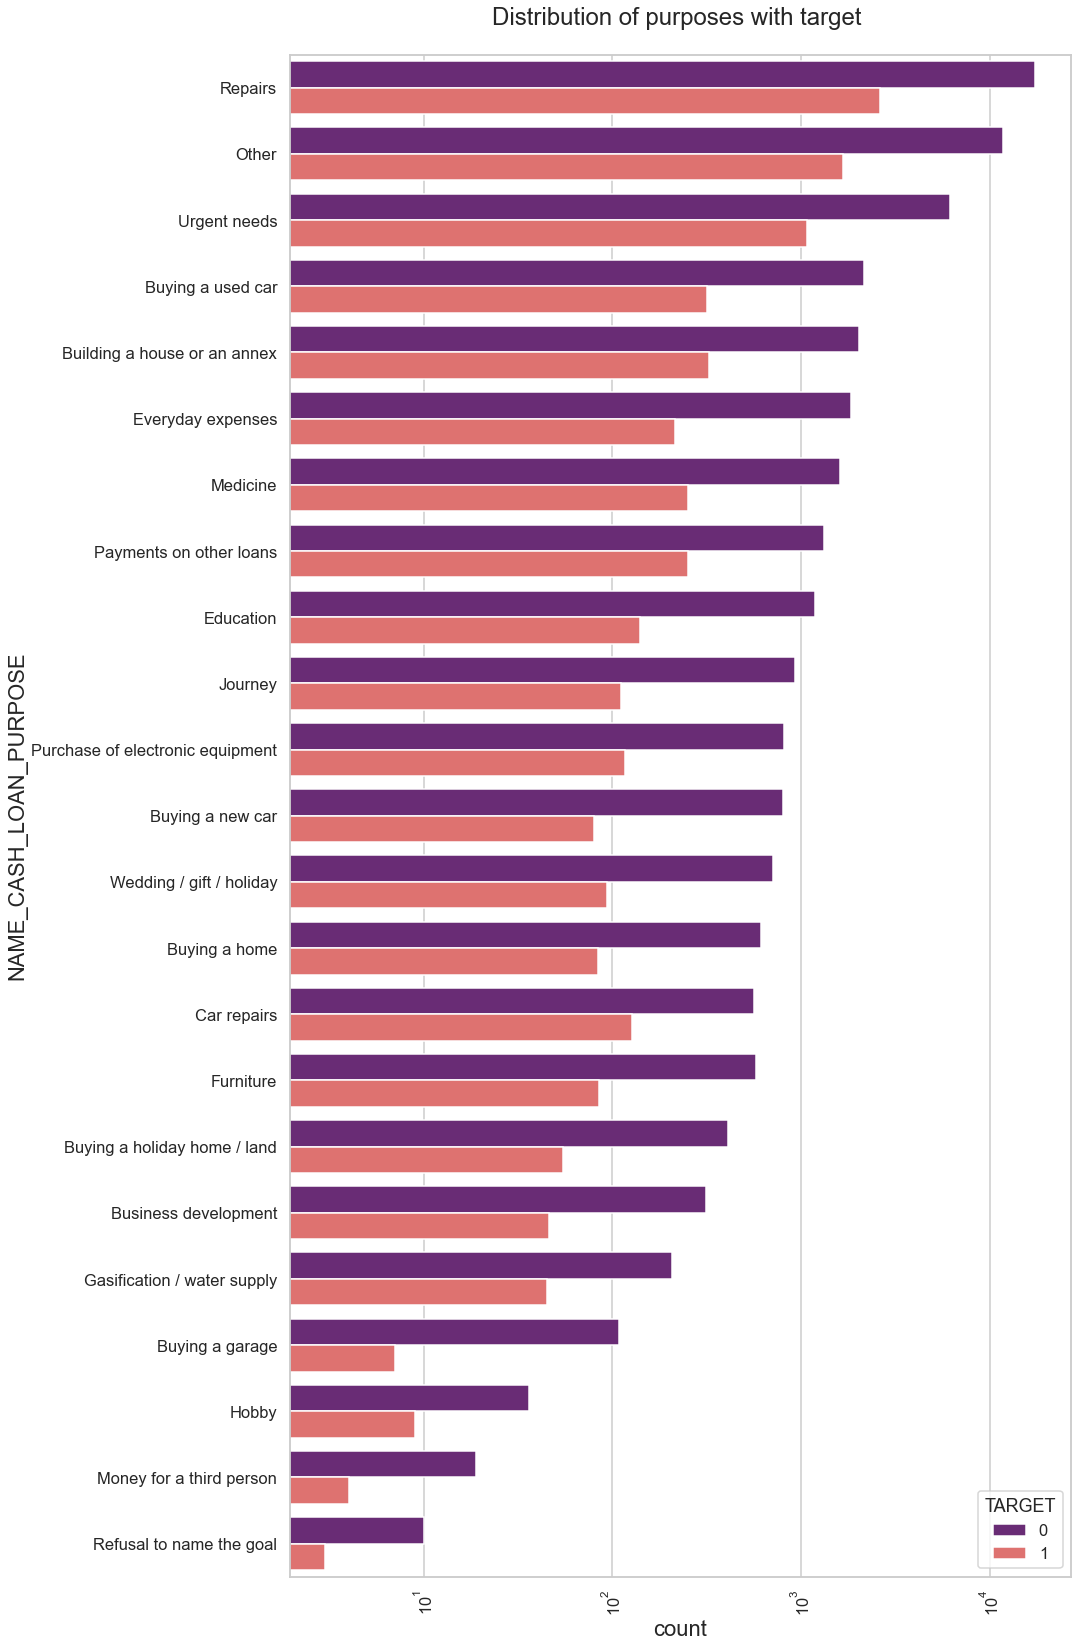

In [81]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(14,28))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = all_app1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=all_app1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

# Observation

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.

2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

# Box plotting for Credit amount prev vs Housing type in logarithmic scale


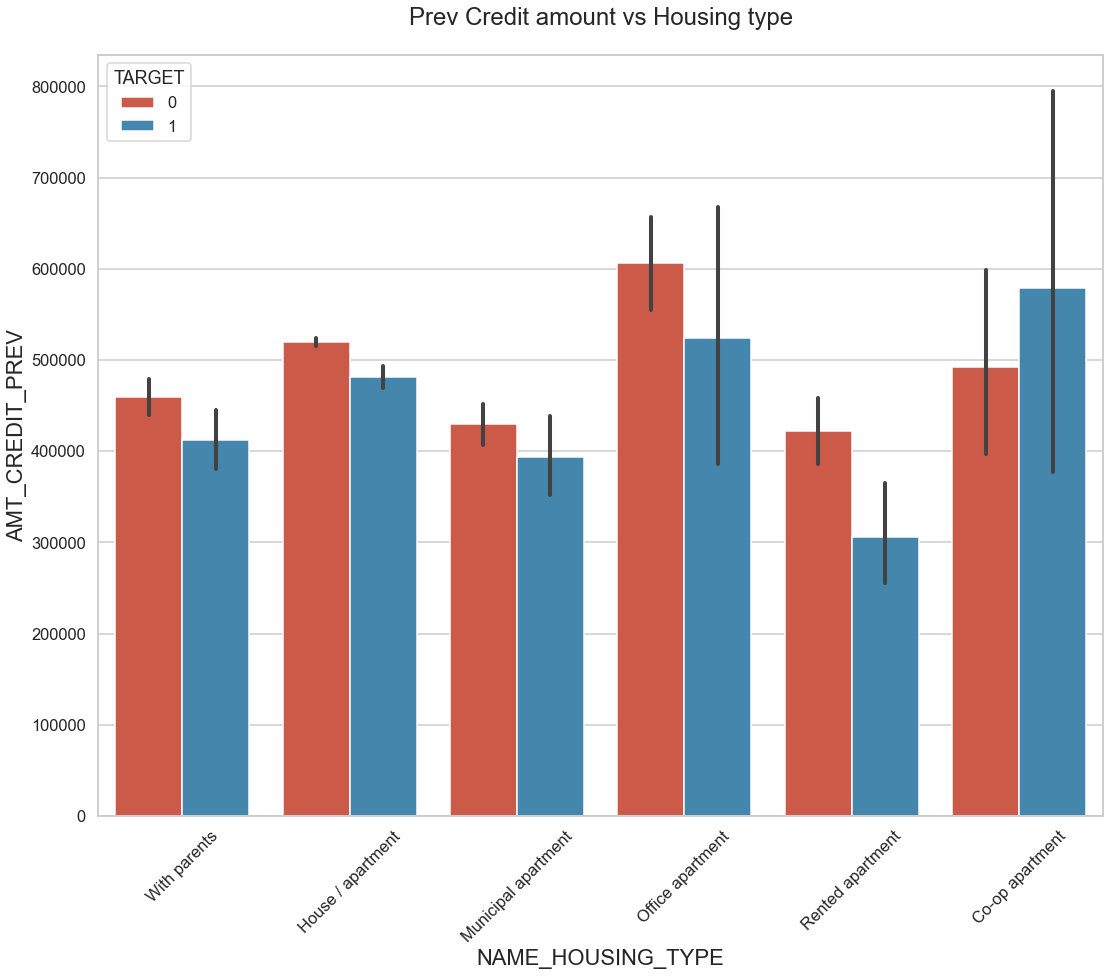

In [82]:
plt.figure(figsize=(18,14))
plt.xticks(rotation=45)
sns.barplot(data =all_app1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

# Observation

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# Overall CONCLUSION
1) Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2) Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3) Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4) Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.